In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.utils.data as dutils

In [7]:
device = 'cpu'
seed = 99
torch.manual_seed(seed);

In [29]:
def getfake(samples, dimensions, epsilon):
    wfake = torch.randn(dimensions)   # fake weight vector for separation
    bfake = torch.randn(1)            # fake bias
    wfake = wfake / torch.norm(wfake)                 # rescale to unit length

    # making some linearly separable data, simply by chosing the labels accordingly
    X = torch.zeros(size=(samples, dimensions))
    Y = torch.zeros(samples)
    print(wfake, bfake)
    i = 0
    while (i < samples):
        tmp = torch.randn(dimensions)
        margin = torch.dot(tmp, wfake) + bfake
        if (torch.norm(tmp).item() < 3) and (abs(margin.item()) > epsilon):
            X[i,:] = tmp
            Y[i] = 1 if margin.item() > 0 else -1
            print(torch.norm(tmp), tmp, margin, Y[i])
            i += 1
    return X, Y

# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        color = 'r' if y.item() == 1 else 'b'
        plt.scatter(x[0].item(), x[1].item(), color=color)

# plot contour plots on a [-3,3] x [-3,3] grid
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = torch.zeros(size=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = torch.from_numpy(xx)
    zz[:,:,1] = torch.from_numpy(yy)
    vv = torch.mm(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv.numpy())
    plt.clabel(CS, inline=1, fontsize=10)
    

(tensor([-0.1699,  0.9855]), tensor([0.0606]))
(tensor(0.7145), tensor([0.0072, 0.7144]), tensor([3.6893e+19]), tensor(1.))
(tensor(1.3361), tensor([0.1044, 1.3320]), tensor([-3.6893e+19]), tensor(-1.))
(tensor(0.2672), tensor([ 0.1879, -0.1899]), tensor([-3.6893e+19]), tensor(-1.))
(tensor(2.4855), tensor([1.4650, 2.0078]), tensor([3.6893e+19]), tensor(1.))
(tensor(0.7441), tensor([0.3328, 0.6656]), tensor([-3.6893e+19]), tensor(-1.))
(tensor(2.0468), tensor([0.3114, 2.0230]), tensor([-3.6893e+19]), tensor(-1.))
(tensor(2.7016), tensor([ 2.5950, -0.7512]), tensor([-1.9394]), tensor(-1.))
(tensor(0.5947), tensor([0.5580, 0.2058]), tensor([3.6893e+19]), tensor(1.))
(tensor(0.1721), tensor([0.0996, 0.1403]), tensor([3.6893e+19]), tensor(1.))
(tensor(1.0011), tensor([-0.9959,  0.1024]), tensor([3.6893e+19]), tensor(1.))
(tensor(0.6878), tensor([0.5358, 0.4312]), tensor([2.0606]), tensor(1.))
(tensor(0.7224), tensor([0.1708, 0.7019]), tensor([-1.9394]), tensor(-1.))
(tensor(1.6909), tensor

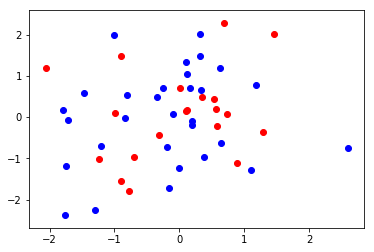

In [30]:
X, Y = getfake(50, 2, 0.3)
plotdata(X,Y)
plt.show()

Encountered an error and updated parameters
data   [-0.6801703 -1.1036891], label 1.0
weight [-0.6801703 -1.1036891], bias  1.0


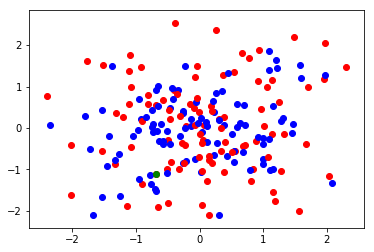

Encountered an error and updated parameters
data   [ 0.22009741 -0.64701295], label -1.0
weight [-0.9002677  -0.45667613], bias  0.0


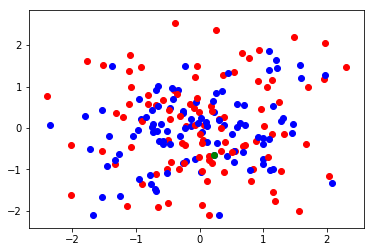

Encountered an error and updated parameters
data   [1.5931304 1.1962725], label -1.0
weight [-2.4933982 -1.6529486], bias  -1.0


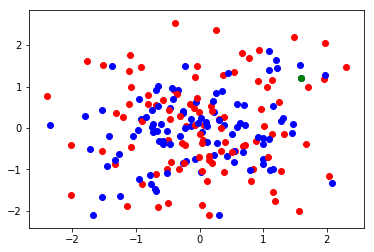

Encountered an error and updated parameters
data   [0.78091776 1.6865268 ], label 1.0
weight [-1.7124804   0.03357816], bias  0.0


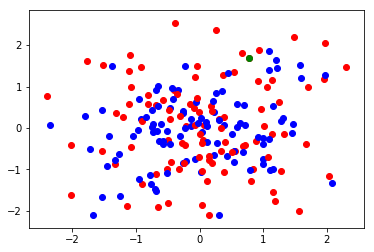

Encountered an error and updated parameters
data   [ 0.8394097  -0.99688464], label 1.0
weight [-0.8730707 -0.9633065], bias  1.0


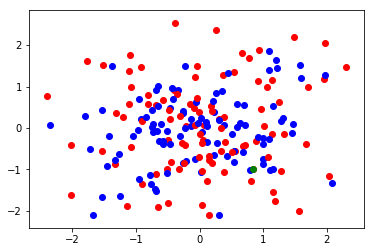

Encountered an error and updated parameters
data   [0.6707599 1.8210254], label 1.0
weight [-0.2023108  0.8577189], bias  2.0


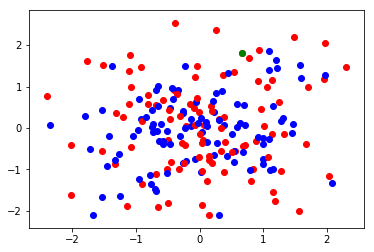

Encountered an error and updated parameters
data   [0.35619274 0.8897947 ], label -1.0
weight [-0.5585035  -0.03207582], bias  1.0


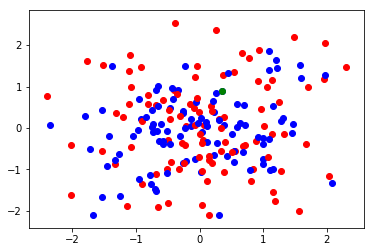

Encountered an error and updated parameters
data   [-0.6432267  -0.31980017], label -1.0
weight [0.08472317 0.28772435], bias  0.0


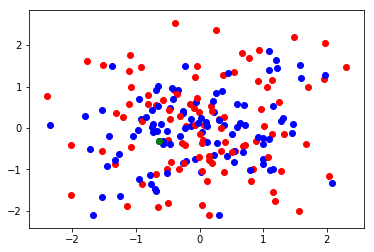

Encountered an error and updated parameters
data   [1.7087617  0.98597276], label 1.0
weight [1.7934849 1.2736971], bias  1.0


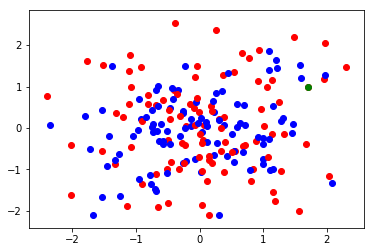

Encountered an error and updated parameters
data   [0.37764862 0.06734335], label -1.0
weight [1.4158363 1.2063538], bias  0.0


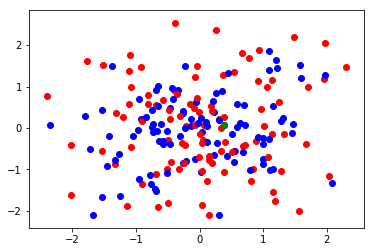

Encountered an error and updated parameters
data   [0.36254117 1.2821565 ], label 1.0
weight [1.7783775 2.4885101], bias  1.0


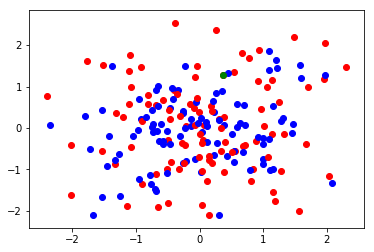

Encountered an error and updated parameters
data   [ 0.5552969 -0.5545648], label 1.0
weight [2.3336744 1.9339454], bias  2.0


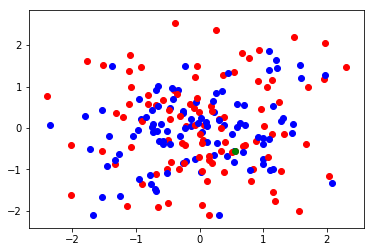

Encountered an error and updated parameters
data   [ 0.14625643 -0.6826627 ], label 1.0
weight [2.4799309 1.2512827], bias  3.0


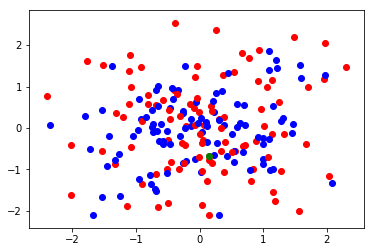

Encountered an error and updated parameters
data   [-1.044678   -0.19820961], label -1.0
weight [3.5246089 1.4494923], bias  2.0


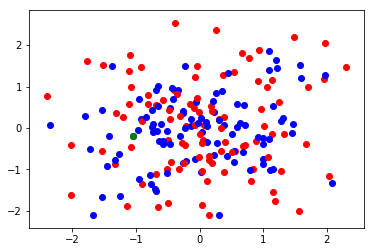

Encountered an error and updated parameters
data   [0.6387977  0.11994162], label -1.0
weight [2.885811  1.3295507], bias  1.0


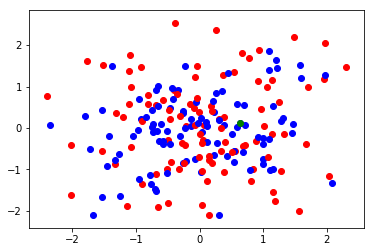

Encountered an error and updated parameters
data   [-1.2437706 -1.6508086], label -1.0
weight [4.1295815 2.9803593], bias  0.0


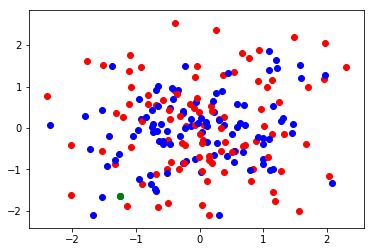

Encountered an error and updated parameters
data   [1.2857652  0.15657371], label -1.0
weight [2.8438163 2.8237855], bias  -1.0


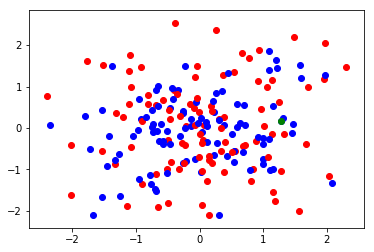

Encountered an error and updated parameters
data   [-0.44989318 -0.8289738 ], label 1.0
weight [2.393923  1.9948118], bias  0.0


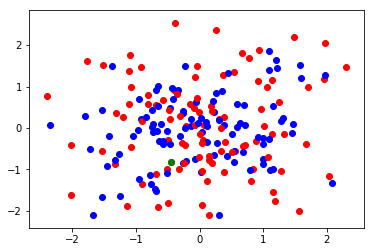

Encountered an error and updated parameters
data   [-0.46846613  0.4782745 ], label -1.0
weight [2.862389  1.5165373], bias  -1.0


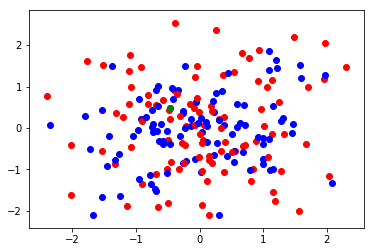

Encountered an error and updated parameters
data   [-0.22713166  1.4857118 ], label -1.0
weight [3.0895207 0.0308255], bias  -2.0


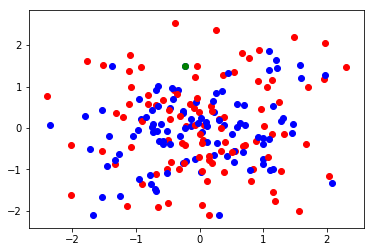

Encountered an error and updated parameters
data   [-0.6921713  0.5635133], label 1.0
weight [2.3973494 0.5943388], bias  -1.0


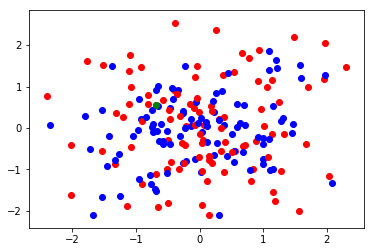

Encountered an error and updated parameters
data   [-0.49233538 -1.8225648 ], label 1.0
weight [ 1.905014  -1.2282261], bias  0.0


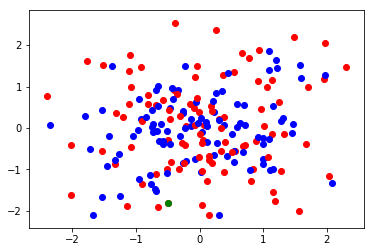

Encountered an error and updated parameters
data   [-0.7770324 -1.1476451], label -1.0
weight [ 2.6820464  -0.08058095], bias  -1.0


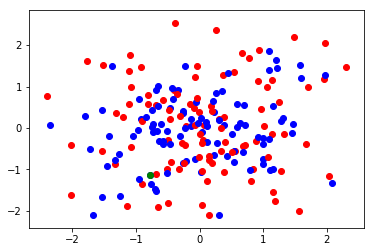

Encountered an error and updated parameters
data   [-0.9037526   0.15718856], label 1.0
weight [1.7782938  0.07660761], bias  0.0


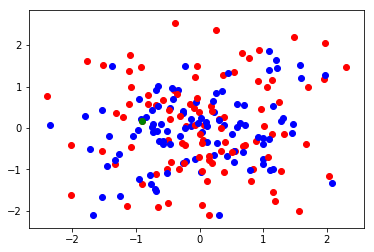

Encountered an error and updated parameters
data   [ 0.9896197  -0.74278355], label -1.0
weight [0.7886742  0.81939113], bias  -1.0


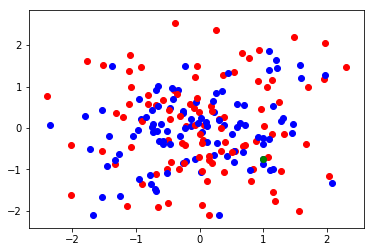

Encountered an error and updated parameters
data   [ 0.04702917 -0.2906659 ], label 1.0
weight [0.8357034  0.52872527], bias  0.0


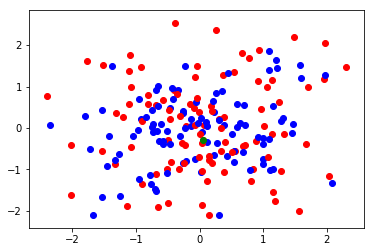

Encountered an error and updated parameters
data   [-0.75818545 -1.3498784 ], label -1.0
weight [1.5938888 1.8786037], bias  -1.0


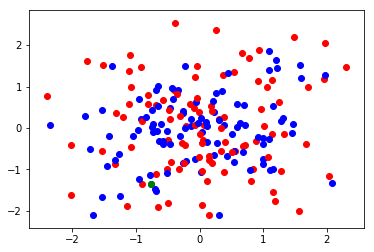

Encountered an error and updated parameters
data   [ 1.562283  -2.0150616], label 1.0
weight [ 3.1561718  -0.13645792], bias  0.0


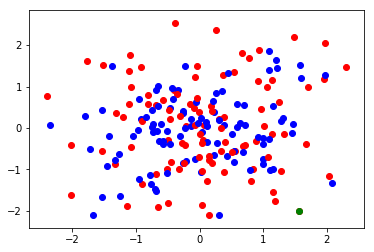

Encountered an error and updated parameters
data   [-0.26591584  0.40385914], label -1.0
weight [ 3.4220877  -0.54031706], bias  -1.0


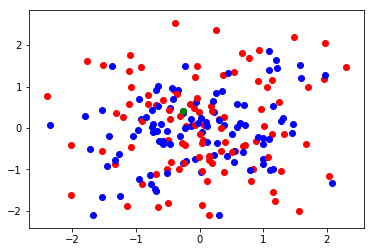

Encountered an error and updated parameters
data   [-0.00230679  0.37251315], label 1.0
weight [ 3.419781   -0.16780391], bias  0.0


KeyboardInterrupt: 

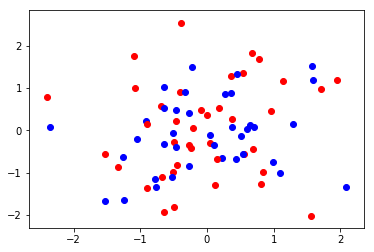

In [6]:
def perceptron(w,b,x,y):
    if (y * (torch.dot(w,x) + b)).item() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

w = torch.zeros(2)
b = torch.zeros(1)
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data   {}, label {}'.format(x.numpy(),y.item()))
        print('weight {}, bias  {}'.format(w.numpy(),b.item()))
#         plotscore(w,b)
        plotdata(X,Y)
        plt.scatter(x[0].item(), x[1].item(), color='g')
        plt.show()